In [60]:
import pandas as pd
import numpy as np
from binance.client import Client
from datetime import datetime
from ta import add_all_ta_features
from ta.utils import dropna
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

from sklearn import model_selection as ms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [61]:
# initialize
with open('api_key.txt','r') as f:
    api_key = f.read()
with open('api_secret.txt','r') as f:
    api_secret = f.read()

client = Client(api_key, api_secret)

In [82]:
#get current price
curr = 'BCHUSDT'
btc_price = client.get_symbol_ticker(symbol=curr)
print(btc_price)

{'symbol': 'BCHUSDT', 'price': '308.45000000'}


In [138]:
#get historical multiple data (d days back with 3m interval)
colnames_raw = ['Date', 'Open', 'High', 'Low', 'Close','Volume','CloseDate','QAV','Trades','TBBAV','TBQAV','Ignore']
d = 5
ts = 1000*int(datetime.timestamp(datetime.now())-d*86400)
currs = ['BTCUSDT','ETHUSDT','LTCUSDT','XRPUSDT','BCHUSDT']
all_df = pd.DataFrame()
for coin in currs:
    bars = client.get_historical_klines(coin, '1m', ts, limit=1000)
    colnames = [coin+'_'+cn for cn in colnames_raw]
    #create pandas dataframe
    coin_df = pd.DataFrame(bars, columns=colnames)
    coin_df[coin+'_Date'] = coin_df[coin+'_Date'].astype('datetime64[ms]')
    coin_df = coin_df.drop([coin+'_CloseDate',coin+'_QAV',coin+'_TBBAV',coin+'_TBQAV',coin+'_Ignore'],axis=1)
    coin_df.set_index(coin+'_Date', inplace=True)

    for c in coin_df.columns:
        coin_df[c] = coin_df[c].astype(float)
        
    
    all_df = pd.concat([all_df,coin_df],axis=1)
    print(coin)

BTCUSDT
ETHUSDT
LTCUSDT
XRPUSDT
BCHUSDT


In [213]:
target = 'BTCUSDT_Close'

inv_df = all_df[[curr+'_Close' for curr in currs]]
inv_df = (inv_df.pct_change()>0).astype(int)

inv_df[target] = inv_df[target].shift(-1)
inv_df = inv_df.dropna()
X_train,X_test,y_train,y_test = ms.train_test_split(inv_df.drop(target,axis=1),inv_df[target])
model = RandomForestClassifier()
model.fit(X_train,y_train)
model.score(X_test,y_test)
mt.plot_confusion_matrix(model,X_test,y_test,normalize='true')

RandomForestClassifier()

0.4855555555555556

In [218]:
import sklearn.metrics as mt

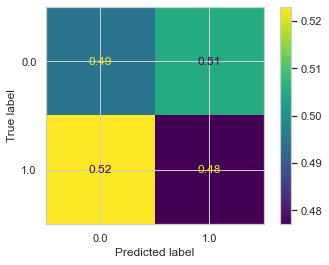

In [191]:
i1df = all_df[[curr+'_Close' for curr in currs]].pct_change().dropna()

In [205]:
i1df['BTCUSDT_Close'][i1df['BTCUSDT_Close']>0.0001]

2020-12-13 22:46:00    0.000536
2020-12-13 22:47:00    0.001865
2020-12-13 22:48:00    0.000160
2020-12-13 22:50:00    0.000125
2020-12-13 22:51:00    0.000182
                         ...   
2020-12-18 22:30:00    0.002472
2020-12-18 22:35:00    0.002370
2020-12-18 22:36:00    0.001601
2020-12-18 22:40:00    0.001672
2020-12-18 22:41:00    0.000257
Name: BTCUSDT_Close, Length: 3163, dtype: float64

In [185]:
len(i1df)

7199

In [64]:
#get historical data (d days back with 3m interval)
d = 120
ts = 1000*int(datetime.timestamp(datetime.now())-d*86400)
bars = client.get_historical_klines(curr, '3m', ts, limit=1000)

In [68]:
#create pandas dataframe
btc_df = pd.DataFrame(bars, columns=['Date', 'Open', 'High', 'Low', 'Close','Volume','CloseDate',
                                     'QAV','Trades','TBBAV','TBQAV','Ignore'])
btc_df.Date = btc_df.Date.astype('datetime64[ms]')
btc_df = btc_df.drop(['CloseDate','QAV','TBBAV','TBQAV','Ignore'],axis=1)
btc_df.set_index('Date', inplace=True)

for c in btc_df.columns:
    btc_df[c] = btc_df[c].astype(float)
btc_df

,Open,High,Low,Close,Volume,Trades
Date,,,,,,
2020-08-20 22:09:00,11825.76,11827.50,11820.29,11821.14,74.257198,1668.0
2020-08-20 22:12:00,11821.13,11825.06,11820.04,11823.89,42.708361,885.0
2020-08-20 22:15:00,11823.89,11824.72,11821.85,11822.98,54.211805,1109.0
2020-08-20 22:18:00,11822.98,11826.81,11817.73,11823.16,51.865486,996.0
2020-08-20 22:21:00,11823.45,11838.03,11821.75,11837.79,71.330969,1207.0
...,...,...,...,...,...,...
2020-12-18 21:54:00,22914.75,22915.77,22826.51,22873.30,223.139452,4075.0
2020-12-18 21:57:00,22873.31,22901.95,22872.30,22880.07,142.089809,2901.0
2020-12-18 22:00:00,22880.07,22931.25,22874.42,22927.20,137.400886,2855.0


In [14]:
#add technical analysis
ta_df = add_all_ta_features(
    btc_df, open="Open", high="High", low="Low", close="Close", volume="Volume")

ta_df.isna().sum()[ta_df.isna().sum()>80].keys()

ta_df3 = ta_df.copy()
ta_df2 = ta_df.drop(ta_df.isna().sum()[ta_df.isna().sum()>80].keys(),axis=1)
print(len(ta_df2.columns))
ta_df = ta_df2.dropna()
ta_df.head()

/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:608: RuntimeWarning: invalid value encountered in double_scalars
  dip[i] = 100 * (self._dip[i]/self._trs[i])
/opt/anaconda3/lib/python3.7/site-packages/ta/trend.py:612: RuntimeWarning: invalid value encountered in double_scalars
  din[i] = 100 * (self._din[i]/self._trs[i])


76


,Open,High,Low,Close,Volume,Trades,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_uo,momentum_stoch,momentum_stoch_signal,momentum_wr,momentum_ao,momentum_kama,momentum_roc,others_dr,others_dlr,others_cr
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-22 01:00:00,3841.03,3844.98,3800.2,3823.23,1995.554354,12288.0,17857.735186,719.153228,-0.089532,-36829.346027,...,42.887125,19.293788,23.111502,-80.706212,-128.274647,3868.262688,-4.605032,-0.513406,-0.514729,3.470925
2018-12-22 02:00:00,3823.23,3844.02,3790.0,3841.63,1443.190681,10204.0,19173.224063,2162.343909,-0.091242,-27774.481090,...,53.312484,25.739390,23.584629,-74.260610,-121.756971,3866.721304,-3.927786,0.481268,0.480114,3.968898
2018-12-22 03:00:00,3841.63,3843.53,3816.5,3818.21,1154.849807,7520.0,18164.492878,1007.494102,-0.137144,-27670.495575,...,53.508303,20.095641,21.709606,-79.904359,-115.084294,3863.279960,-3.212224,-0.609637,-0.611503,3.335065
2018-12-22 04:00:00,3818.65,3832.38,3788.0,3804.74,1421.701323,8892.0,17815.314319,-414.207221,-0.138836,-26453.327181,...,47.753477,16.855606,20.896879,-83.144394,-112.531118,3858.708643,-3.064443,-0.352783,-0.353407,2.970517
2018-12-22 05:00:00,3804.74,3829.00,3785.0,3818.68,1324.976830,8518.0,18518.756564,910.769609,-0.101555,-20035.683725,...,52.675455,25.504921,20.818723,-74.495079,-115.454588,3858.317063,-2.583700,0.366385,0.365716,3.347785


In [18]:
#create sma df
m0 = ta_df.Close - ta_df.Close.rolling(1).mean()
m1 = ta_df.Close - ta_df.Close.rolling(2).mean()
m2 = ta_df.Close - ta_df.Close.rolling(3).mean()
m3 = ta_df.Close - ta_df.Close.rolling(5).mean()
m4 = ta_df.Close - ta_df.Close.rolling(7).mean()
m5 = ta_df.Close - ta_df.Close.rolling(9).mean()
m6 = ta_df.Close - ta_df.Close.rolling(12).mean()
m7 = ta_df.Close - ta_df.Close.rolling(24).mean()


sma_df = pd.concat([ta_df.Close,m0,m1,m2,m3,m4,m5,m6,m7],axis=1).dropna()
sma_df.columns = ['Close',1,2,3,5,7,9,12,24]
for i in [1,2,3,5,7,9,12,24]:
    sma_df = pd.concat([sma_df,np.sign(sma_df[i]).diff()/2],axis=1)
sma_df.columns = ['Close',1,2,3,5,7,9,12,24,'1i','2i','3i','5i','7i','9i','12i','24i']
sma_df['result'] = sma_df[['1i','2i','3i','5i','7i','9i','12i','24i']].sum(axis=1)
sma_df = sma_df.dropna()

In [19]:
sma_df

,Close,1,2,3,5,7,9,12,24,1i,2i,3i,5i,7i,9i,12i,24i,result
Date,,,,,,,,,,,,,,,,,,
2018-12-23 01:00:00,3963.52,-3.183231e-12,-6.845,0.306667,41.482,54.962857,69.361111,84.652500,101.686250,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
2018-12-23 02:00:00,3948.07,-3.637979e-12,-7.725,-14.863333,10.612,29.482857,41.598889,59.086667,81.801250,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,-1.0
2018-12-23 03:00:00,3980.97,-3.637979e-12,16.450,16.783333,17.234,46.794286,59.976667,79.414167,107.919583,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2018-12-23 04:00:00,3966.28,-3.637979e-12,-7.345,1.173333,-0.930,18.488571,35.462222,54.384167,86.498750,0.0,-1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-2.0
2018-12-23 05:00:00,3977.99,-4.092726e-12,5.855,2.910000,10.624,11.854286,35.378889,54.366667,91.570833,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-18 17:00:00,22749.32,-1.673470e-10,15.020,76.786667,109.314,31.374286,-51.025556,-114.715000,-136.338333,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2020-12-18 18:00:00,22781.44,-1.709850e-10,16.060,31.426667,99.502,78.455714,29.025556,-64.840833,-84.683750,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2020-12-18 19:00:00,22762.28,-1.709850e-10,-9.580,-2.066667,50.016,84.601429,32.353333,-59.525833,-98.143750,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,-2.0


In [59]:
s1_df = sma_df
fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('Price', color=color)
ax1.plot(s1_df.index,s1_df.Close)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('SMA', color=color)  # we already handled the x-label with ax1
ax2.plot(s1_df.index, s1_df[3], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

NameError: name 'plt' is not defined

In [54]:
#sim
s1_df = sma_df
comission = 0.999
buy=0
sell=0
queue='b'
capital = 100
coins = 0
ltp = 0
for val in s1_df[['Close',1,'7i']].values:
    if val[1]<0 and val[2]==-1 and queue=='b':
        #buy
        buy+=1
        coins = comission*capital/(val[0])
        capital = 0
        queue = 's'
        ltp = val[0]
        #print('coins',coins)
        
    elif val[1]>0 and val[2]==1 and queue=='s' and val[0]>ltp:
        #sell
        sell+=1
        capital = comission*coins*val[0]
        coins = 0
        #print('capital',capital)
        queue = 'b'
        ltp = val[0]

In [55]:
capital

0

In [56]:
coins

0.012221485349453151

In [57]:
s1_df.iloc[-1,0]*coins

281.02731151256097

In [58]:
s1_df.iloc[-1,0]*(comission*100/s1_df.iloc[0,0])

579.5741025653964

In [35]:
s1_df.iloc[0,0]

3963.52

In [39]:
s1_df.iloc[-1,0]

22994.53